In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

# Modelling
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

import xgboost as xgb # xgb.XGBClassifier
import warnings

In [3]:
df = pd.read_csv('../artifacts/train.csv')
X_train = df.drop(["label_1", "label_X", "label_2"],axis=1)
y_train = df["label_1"]

In [13]:
X_train

,rounds_left,win_share_latest_5_games_overall_home_team,draw_share_latest_5_games_overall_home_team,loss_share_latest_5_games_overall_home_team,avg_goals_scored_latest_5_games_overall_home_team,avg_goals_conceded_latest_5_games_overall_home_team,win_share_latest_5_games_overall_away_team,draw_share_latest_5_games_overall_away_team,loss_share_latest_5_games_overall_away_team,avg_goals_scored_latest_5_games_overall_away_team,...,tbl_away_games_left_season,tbl_away_position,tbl_away_points_to_team_above,tbl_away_points_to_team_below,tbl_away_games_left_diff_above,tbl_away_games_left_diff_below,tbl_away_points_to_win,tbl_away_points_to_cl,tbl_away_points_to_euro,tbl_away_points_to_regulation
0,12,0.200000,0.00,0.800000,0.40,1.400000,0.4,0.2,0.4,2.0,...,14,20.0,-3.0,0.0,1.0,0.0,-42,-27,-21,-3
1,18,0.400000,0.00,0.600000,0.40,0.600000,0.4,0.2,0.4,1.4,...,20,15.0,-3.0,0.0,1.0,2.0,-22,-16,-13,7
2,33,0.000000,0.25,0.750000,1.25,3.250000,0.0,0.0,1.0,1.0,...,34,19.0,0.0,1.0,1.0,-1.0,-12,-8,-7,0
3,17,0.600000,0.40,0.000000,1.60,0.600000,0.6,0.0,0.4,1.6,...,18,3.0,-2.0,2.0,1.0,0.0,-5,2,6,25
4,23,0.600000,0.00,0.400000,1.60,1.000000,0.8,0.2,0.0,3.0,...,24,2.0,-4.0,1.0,0.0,0.0,-4,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,34,0.333333,0.00,0.666667,1.00,1.666667,0.0,0.0,1.0,0.0,...,35,12.0,-1.0,1.0,0.0,0.0,-6,-4,-3,3
859,30,0.400000,0.20,0.400000,1.20,1.200000,0.6,0.0,0.4,1.0,...,31,11.0,0.0,1.0,0.0,0.0,-6,-4,-2,7
860,12,0.600000,0.20,0.200000,2.20,0.600000,0.0,0.2,0.8,0.4,...,16,6.0,-2.0,2.0,3.0,1.0,-24,-4,2,22
861,21,0.200000,0.40,0.400000,1.00,1.800000,0.4,0.4,0.2,1.6,...,23,15.0,-3.0,3.0,2.0,0.0,-14,-10,-7,8


In [7]:
X_train.groupby('tbl_home_points_to_regulation').size().head(20)

tbl_home_points_to_regulation
-12     2
-11     1
-10     1
-9      2
-8      4
-7      4
-6      5
-5      3
-4      5
-3     11
-2     17
-1     19
 0     90
 1     35
 2     33
 3     41
 4     34
 5     30
 6     38
 7     42
dtype: int64

In [11]:
numerical_columns = [feature for feature in X_train.columns if X_train[feature].dtype != 'O']
categorical_columns = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']

num_pipeline= Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder()),
    ("scaler",StandardScaler(with_mean=False))
    ]
)

preprocessor=ColumnTransformer(
    [
    ("num_pipeline",num_pipeline,numerical_columns),
    ("cat_pipelines",cat_pipeline,categorical_columns)
    ]
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=8, min_samples_split=20))
])

In [12]:
numerical_columns

['rounds_left',
 'win_share_latest_5_games_overall_home_team',
 'draw_share_latest_5_games_overall_home_team',
 'loss_share_latest_5_games_overall_home_team',
 'avg_goals_scored_latest_5_games_overall_home_team',
 'avg_goals_conceded_latest_5_games_overall_home_team',
 'win_share_latest_5_games_overall_away_team',
 'draw_share_latest_5_games_overall_away_team',
 'loss_share_latest_5_games_overall_away_team',
 'avg_goals_scored_latest_5_games_overall_away_team',
 'avg_goals_conceded_latest_5_games_overall_away_team',
 'win_share_latest_5_games_home_home_team',
 'draw_share_latest_5_games_home_home_team',
 'loss_share_latest_5_games_home_home_team',
 'avg_goals_scored_latest_5_games_home_home_team',
 'avg_goals_conceded_latest_5_games_home_home_team',
 'win_share_latest_5_games_away_away_team',
 'draw_share_latest_5_games_away_away_team',
 'loss_share_latest_5_games_away_away_team',
 'avg_goals_scored_latest_5_games_away_away_team',
 'avg_goals_conceded_latest_5_games_away_away_team',
 '

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['rounds_left',
                                                   'win_share_latest_5_games_overall_home_team',
                                                   'draw_share_latest_5_games_overall_home_team',
                                                   'loss_share_latest_5_games_overall_home_team',
                                                   'avg_goals_scored_latest_5...
                                                   'tbl_home_points_to_team_above',
                                                   'tbl_home_points_to_team_below',
                                                   'tbl_home_games_left_diff_above',
                                                   'tbl_home_games_left_diff_below', ...]),
                                                 ('cat_pipelines',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  [])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=20))])

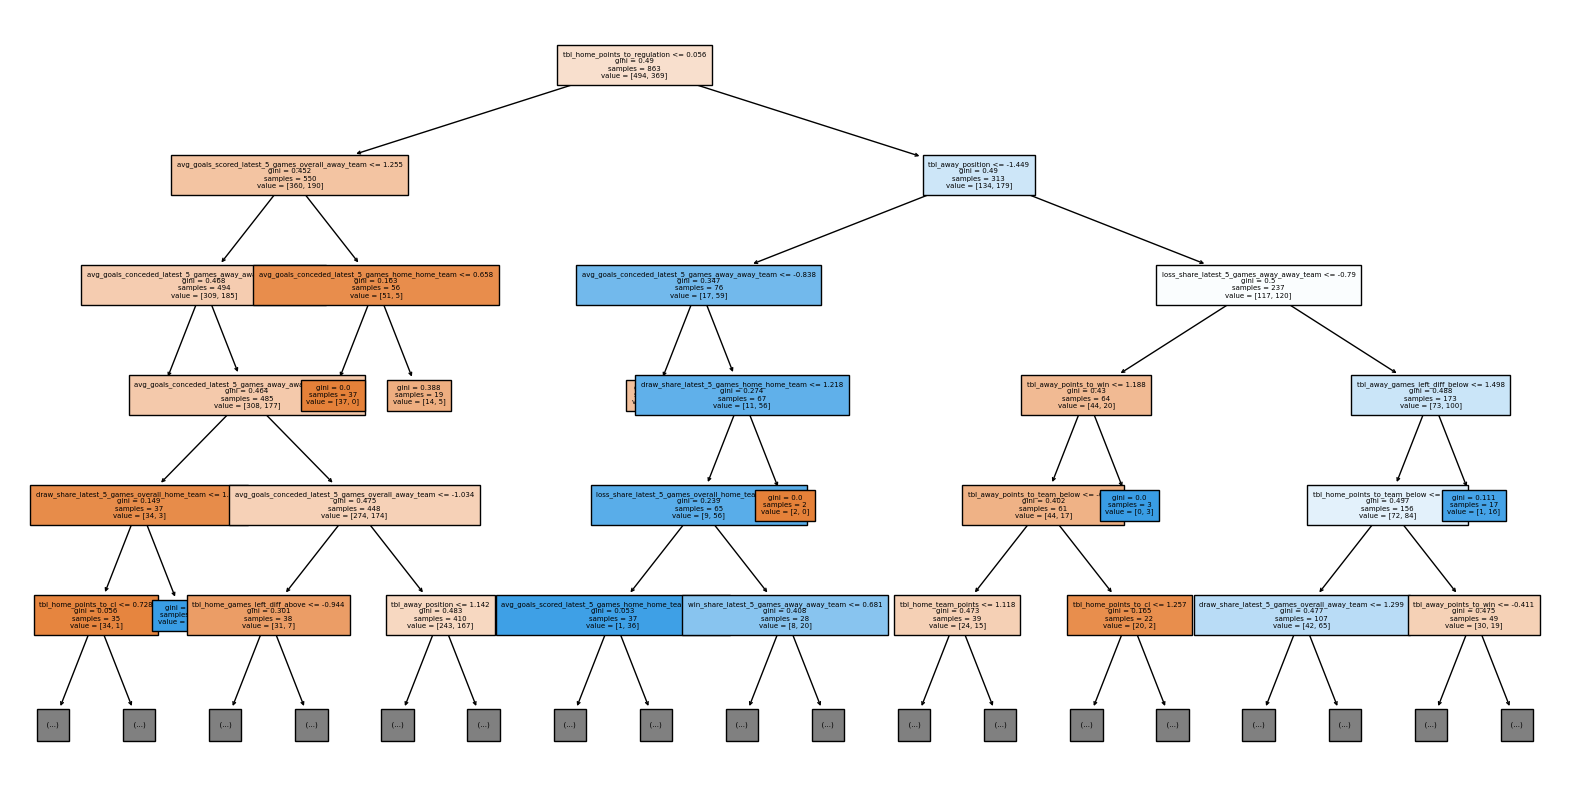

In [38]:
# Access the trained decision tree model
dt_model = pipeline.named_steps['model']

# Plot the decision tree
from sklearn import tree

fig, axe = plt.subplots(figsize=(20,10))
tree.plot_tree(dt_model, ax = axe, fontsize=5, feature_names=numerical_columns+categorical_columns, filled=True, max_depth=5)


#plt.figure(figsize=(20, 16))
#plot_tree(dt_model, feature_names=numerical_columns+categorical_columns, filled=True)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

In [ ]:
# Access the trained decision tree model
dt_model = pipeline.named_steps['model']

# Plot the decision tree
from sklearn import tree

fig, axe = plt.subplots(figsize=(20,10))
tree.plot_tree(dt_model, ax = axe, fontsize=5)


#plt.figure(figsize=(20, 16))
plot_tree(dt_model, feature_names=numerical_columns+categorical_columns, filled=True)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

In [19]:
categorical_columns

[]

In [22]:
dt_model.classes_

array([0, 1], dtype=int64)

In [23]:
str(dt_model.classes_)

'[0 1]'